In this Notebook, we'll be predicting the insurance premium using Random Forest Regressor.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import math

In [2]:
%matplotlib inline
sns.set(color_codes = True)

In [3]:
dataset =  pd.read_csv("insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Converting Categorical column values (Sex and Smoker) into continous values

In [5]:
df_dummies = pd.get_dummies(dataset['sex'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([dataset, df_dummies], axis=1)
del df_new['sex']
df_new.rename(columns = {'female':'sex'}, inplace = True)
df_new.head()

,age,bmi,children,smoker,region,charges,sex
0,19,27.900,0,yes,southwest,16884.92400,1
1,18,33.770,1,no,southeast,1725.55230,0
2,28,33.000,3,no,southeast,4449.46200,0
3,33,22.705,0,no,northwest,21984.47061,0
4,32,28.880,0,no,northwest,3866.85520,0


In [6]:
df_without = pd.get_dummies(df_new['smoker'])
del df_without[df_without.columns[0]]
df_new = pd.concat([df_new, df_without], axis=1)
del df_new['smoker']
del df_new['region']
df_new.rename(columns = {'yes':'smoker'}, inplace = True)
df_new.head()

,age,bmi,children,charges,sex,smoker
0,19,27.900,0,16884.92400,1,1
1,18,33.770,1,1725.55230,0,0
2,28,33.000,3,4449.46200,0,0
3,33,22.705,0,21984.47061,0,0
4,32,28.880,0,3866.85520,0,0


In [7]:
df_without_charges = df_new.copy()
df_without_charges.drop(['charges'], axis = 1, inplace = True)
df_without_charges.head()

,age,bmi,children,sex,smoker
0,19,27.900,0,1,1
1,18,33.770,1,0,0
2,28,33.000,3,0,0
3,33,22.705,0,0,0
4,32,28.880,0,0,0


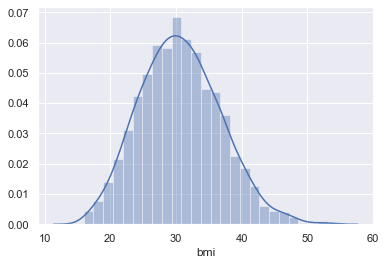

In [8]:
sns.distplot(df_new['bmi'])

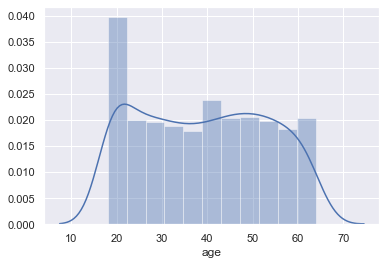

In [9]:
sns.distplot(df_new['age'])

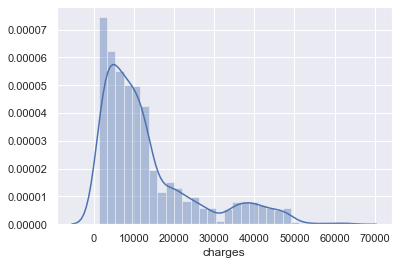

In [10]:
sns.distplot(df_new['charges'])

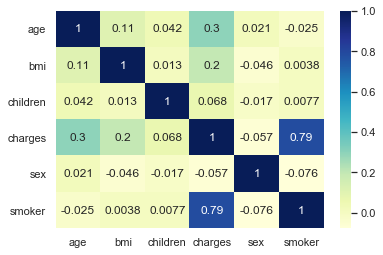

In [11]:
sns.heatmap(df_new.corr(method = 'pearson'),cmap="YlGnBu", annot=True)

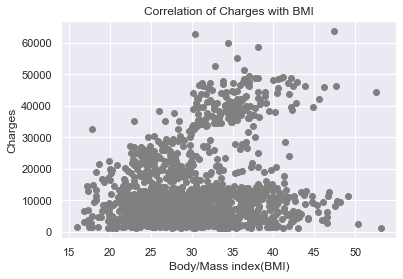

In [13]:
x=df_new.bmi.values.reshape(-1,1)
y=df_new.charges.values.reshape(-1,1)
plt.scatter(x,y,color="grey")
plt.xlabel("Body/Mass index(BMI)")
plt.ylabel("Charges")
plt.title("Correlation of Charges with BMI")
plt.show()


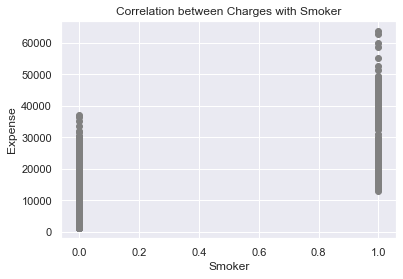

In [14]:

x=df_new.smoker.values.reshape(-1,1)
y=df_new.charges.values.reshape(-1,1)

plt.scatter(x,y,color="grey")
plt.xlabel("Smoker")
plt.ylabel("Expense")
plt.title("Correlation between Charges with Smoker")
plt.show()

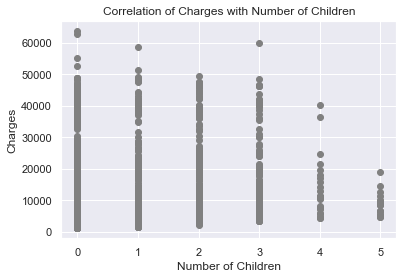

In [17]:

x=df_new.children.values.reshape(-1,1)
y=df_new.charges.values.reshape(-1,1)

plt.scatter(x,y,color="grey")
plt.xlabel("Number of Children")
plt.ylabel("Charges")
plt.title("Correlation of Charges with Number of Children")
plt.show()

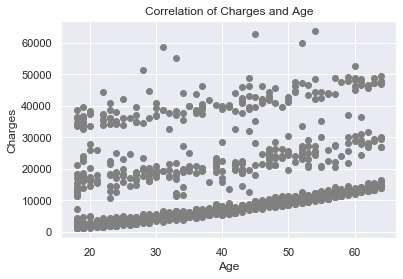

In [18]:
x=df_new.age.values.reshape(-1,1)
y=df_new.charges.values.reshape(-1,1)

plt.scatter(x,y,color="grey")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Correlation of Charges and Age")
plt.show()

In [173]:
train, test = train_test_split(df_new, test_size=0.2)
train_y = train.charges.values
train_x = train.drop(columns=['charges']).values
test_y = test.charges.values
test_x = test.drop(columns=['charges']).values

In [174]:
train.head()

,age,bmi,children,charges,sex,smoker
267,59,32.395,3,14590.63205,1,0
439,26,29.450,0,2897.32350,0,0
444,56,26.695,1,26109.32905,0,1
1333,50,30.970,3,10600.54830,0,0
608,28,26.980,2,4435.09420,0,0


In [175]:
rf_model = RandomForestRegressor()
rf_model.fit(train_x, train_y)
randomForestModel_predict = rf_model.predict(test_x)

In [182]:

MeanSquareError = mean_squared_error(test_y, randomForestModel_predict)
print("Mean Square Error ",MeanSquareError)
print('Root Mean Square Error of model: %.2f (square-rooted)' % math.sqrt(MeanSquareError))

R2 = r2_score(test_y, randomForestModel_predict)
print('R2 of model : %.2f' % R2)

Mean Square Error  21043242.104654323
Root Mean Square Error of model: 4587.29 (square-rooted)
R2 of model : 0.83


In [177]:
results = pd.DataFrame({'Actual': test_y, 'Predicted': randomForestModel_predict})
results

,Actual,Predicted
0,5926.84600,6789.260896
1,46113.51100,45207.692630
2,40720.55105,52214.047049
3,6338.07560,9575.428620
4,12129.61415,12068.088055
...,...,...
263,12629.89670,14325.273516
264,7243.81360,10464.867073
265,12265.50690,21233.974258
266,13228.84695,13983.164261


In [178]:
random_grid = {'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
}

In [179]:
from sklearn.model_selection import RandomizedSearchCV
regressor = RandomForestRegressor(n_jobs=-1)
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42)
rf_random.fit(train_x, train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   3.1s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.2s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.3s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.3s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_samples_split

[CV]  n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.3s
[CV] n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.2s
[CV] n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.4s
[CV] n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=100, min_samples

[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.3s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.3s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.3s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.2s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=80, min_s

[CV]  n_estimators=180, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.7s
[CV] n_estimators=160, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=160, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.4s
[CV] n_estimators=160, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=160, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.7s
[CV] n_estimators=160, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=160, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.6s
[CV] n_estimators=160, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=160, min

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   0.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   0.4s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   0.7s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   0.7s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=20

[CV]  n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   0.4s
[CV] n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   0.6s
[CV] n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   0.5s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.2s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=80, min_sample

[CV]  n_estimators=60, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.2s
[CV] n_estimators=60, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.2s
[CV] n_estimators=60, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.2s
[CV] n_estimators=60, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.4s
[CV] n_estimators=80, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=80, min_samples_sp

[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.3s
[CV] n_estimators=120, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.5s
[CV] n_estimators=120, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.3s
[CV] n_estimators=120, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   0.3s
[CV] n_estimators=120, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=120, min_

[CV]  n_estimators=140, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.4s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.2s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.2s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.2s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=60, min_sample

[CV]  n_estimators=40, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   0.3s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   0.3s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   0.3s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=100,

[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.3s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   0.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   0.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2

[CV]  n_estimators=40, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.2s
[CV] n_estimators=40, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=40, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.2s
[CV] n_estimators=160, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=160, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.4s
[CV] n_estimators=160, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=160, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.4s
[CV] n_estimators=160, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=   0.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=   0.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=   0.3s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   0.3s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=80,

[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.3s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.3s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.3s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.3s
[CV] n_estimators=60, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=60, min_s

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  3.0min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                

In [184]:
rf_random.best_params_

{'n_estimators': 40,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [185]:
rf_model = RandomForestRegressor(n_estimators=40, min_samples_split=10,min_samples_leaf=4,max_features='auto', max_depth =70, bootstrap = True)
rf_model.fit(train_x, train_y)
randomForestModelPredict = rf_model.predict(test_x)
MeanSquareError = mean_squared_error(test_y, randomForestModelPredict)

print('Mean Square Error of model: %.2f (square-rooted)' % math.sqrt(MeanSquareError))

R2 = r2_score(test_y, randomForestModelPredict)
print('R2 of model : %.2f' % R2)

Mean Square Error of model: 4104.49 (square-rooted)
R2 of model : 0.87


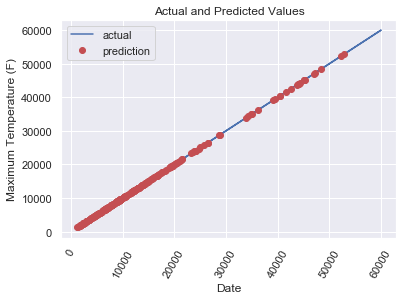

In [186]:
# Dataframe with predictions and dates
results = pd.DataFrame({'Actual': test_y, 'Predicted': randomForestModel_predict})
# Plot the actual values
plt.plot(test_y, test_y, 'b-', label = 'actual')
# Plot the predicted values
plt.plot(randomForestModel_predict, randomForestModel_predict, 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');